In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add target column

# Map target values to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print("Iris Dataset:")
print(df.head())

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Compute summary statistics
summary_stats = df.describe(include='all')

# Add additional statistics (variance, range)
summary_stats.loc['variance'] = df.var(numeric_only=True)
summary_stats.loc['range'] = df.max(numeric_only=True) - df.min(numeric_only=True)

# Display the summary statistics
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
          sepal length (cm)  sepal width (cm)  petal length (cm)  \
count            150.000000        150.000000         150.000000   
unique                  NaN               NaN                NaN   
top                     NaN               NaN                NaN   
freq                    NaN               NaN                NaN   
mean               5.843333          3.057333           3.758000   
std                0.828066          0.435866           1.765298   
min                4.300000          2.000000           1.000000   
25%                5.100000          2.800000           1.600000   
50%                5.800000          3.000000           4.350000   
75%                6.400000          3.300000           5.100000   
max                7.900000          4.400000           6.900000   
variance           0.685694          0.189979           3.116278   
range              3.600000          2.400000           5.900000   

          petal width (cm)

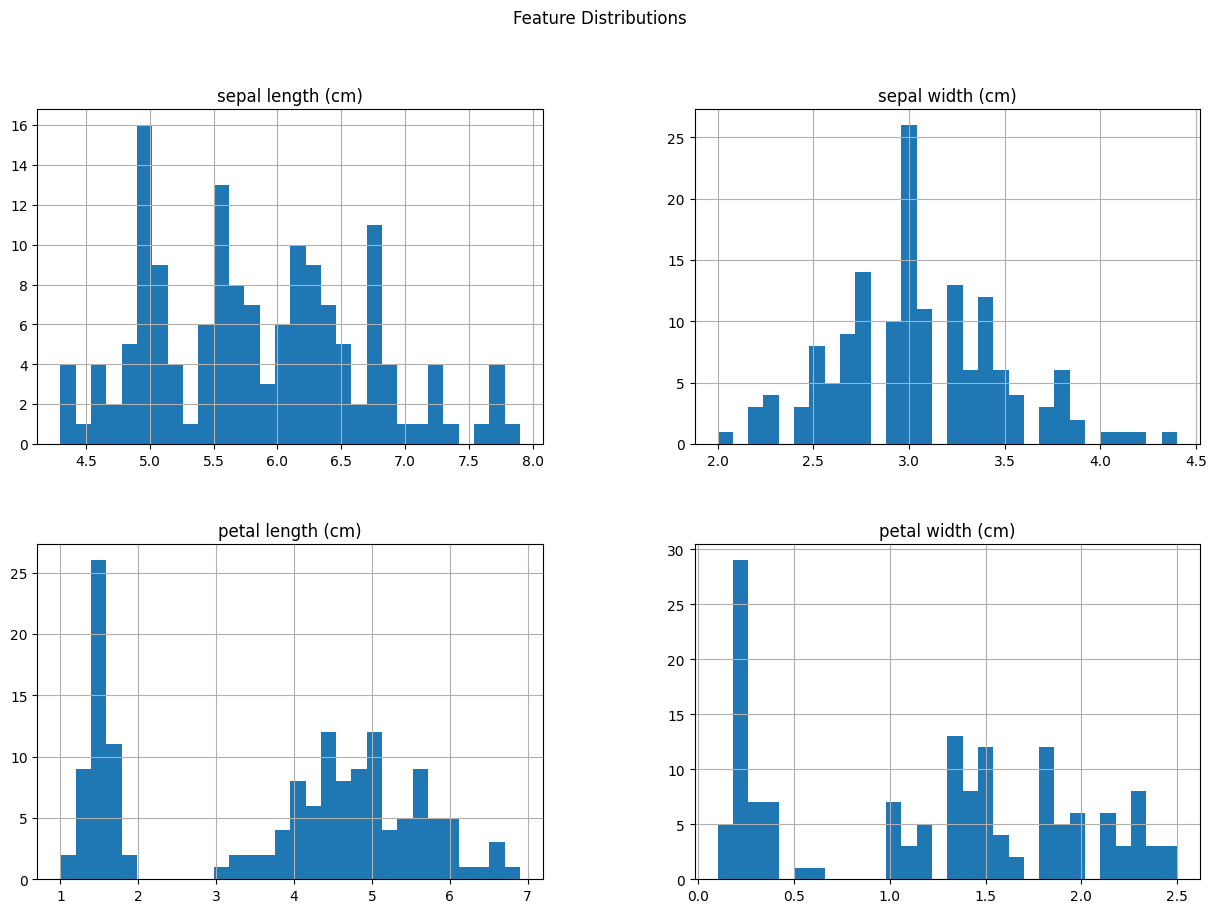

In [5]:
# Plot histograms for all numeric features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print("\nDuplicates Removed. Shape of Dataset:", df.shape)


Duplicates Removed. Shape of Dataset: (149, 5)


In [8]:
# Separate features and target variable
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

In [9]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features:")
print(X_scaled.head())


Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.898033          1.012401          -1.333255         -1.308624
1          -1.139562         -0.137353          -1.333255         -1.308624
2          -1.381091          0.322549          -1.390014         -1.308624
3          -1.501855          0.092598          -1.276496         -1.308624
4          -1.018798          1.242352          -1.333255         -1.308624


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (104, 4)
Testing Data Shape: (45, 4)


In [11]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [12]:
# Save the cleaned dataset
df.to_csv('cleaned_iris_dataset.csv', index=False)

# Save the model (optional)
import joblib
joblib.dump(model, 'iris_classification_model.pkl')

['iris_classification_model.pkl']